# Прогноз необходимого числа наблюдений эксперимента

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# TODO: Определить необходимое число наблюдений 
#       в эксперименте для получения значимого результата:
# Текущий уровень конверсии: 1%
# Минимальный уровень изменений: +0.1%
# Уровень значимости: 95%
# Требуемая мощность критерия: 90%

In [3]:
P = 1 / 100 # conversion rate
Q = 0.95 # significance level

DIFF = 0.1 / 100

In [4]:
P, DIFF

(0.01, 0.001)

### $Z$-score для заданного уровня значимости.

In [5]:
z = st.norm.ppf(Q)

z

1.6448536269514722

Будем рассматривать [приближение биномиального распределения нормальным](https://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation "Binomial distribution - Wikipedia"):

$SEM = \sigma = \sqrt{\frac{P\ (1\ -\ P)}{n}}$ (утверждается, что это уже SEM - стандартная ошибка выборочного среднего)

$z = \frac{P_B\ -\ P_A}{SE_{AB}} = \frac{P_B\ -\ P_A}{\sqrt{\sigma_A^2\ +\ \sigma_B^2}}$

Выразим $n$:

$n = \bigg( \frac{z\ \sqrt{P_A\ (1 - P_A)\ +\ P_B\ (1 - P_B)}}{P_B\ -\ P_A}\bigg)^2$

In [6]:
N = (z * np.sqrt(P * (1 - P) + (P + DIFF) * (1 - P - DIFF)) / DIFF) ** 2

np.round(N)

56218.0

### Оценим мощность критерия.

In [7]:
# изменяя n, влияем на мощность критерия
def criterion_power(n, P, Q, DIFF):
    se = np.sqrt((P * (1 - P) + (P + DIFF) * (1 - P - DIFF)) / n)
    thr = st.norm.ppf(Q, P, se)
    beta = st.norm.cdf(thr, P + DIFF, se)
    power = 1 - beta  # доля верно отклоненных нулевых гипотез

    x = np.linspace(-3*se + P, 5*se + P, 100)
    plt.plot(x, st.norm.pdf(x, P, se))
    plt.plot(x, st.norm.pdf(x, P + DIFF, se))
    plt.axvline(thr, color='k', linestyle='--')
    plt.fill_between(x, st.norm.pdf(x, P, se), where=x<thr)
    plt.fill_between(x, st.norm.pdf(x, P + DIFF, se), where=x>thr)
    plt.title('q=%.2f thr=%.4f power=%.3f' % (Q, thr, power));
    
    return power

Значение мощности критерия для найденного $n$:

0.5

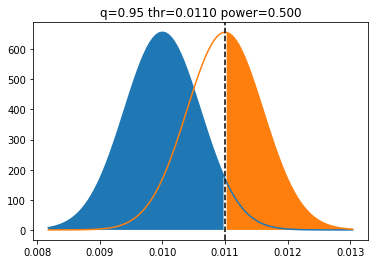

In [8]:
criterion_power(N, P, Q, DIFF)

Подберём $n$, обеспечивающее мощность $90\%$:

0.9000747475164581

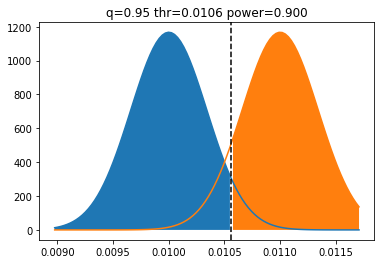

In [9]:
criterion_power(178000, P, Q, DIFF)

### Симулируем эксперимент с подобранными параметрами.

In [10]:
# Визуализируем z-распределение
def plot_zscore(n, p, diff):
    data = np.random.binomial(1, p + diff, int(n))    

    mu = p + diff
    sigma = np.sqrt( mu * (1 - mu) / n )
    SE = sigma
    z = (np.mean(data) - p) / SE
    q = st.norm.cdf(z)

    x = np.linspace(-3, 3, 100)
    plt.plot(x, st.norm.pdf(x))
    plt.axvline(z, color='k', linestyle='--')
    plt.fill(np.hstack([x[x < z], [z]]),
             np.hstack([st.norm.pdf(x[x < z]), [0]]))
    plt.title('n=%d q=%.4f z=%.3f, mean=%.4f' % (n, q, z, np.mean(data)));

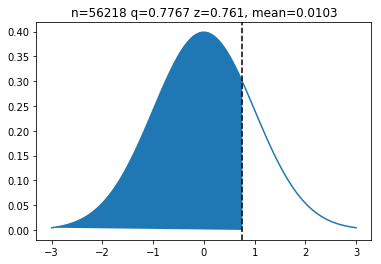

In [11]:
plot_zscore(np.round(N), P, DIFF)

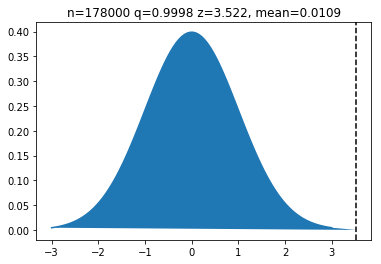

In [12]:
plot_zscore(178000, P, DIFF)

### _References_

[1] [A/B-Test Calculator - Power & Significance - ABTestGuide.com](https://abtestguide.com/calc/ "A/B-Test Calculator - Power & Significance - ABTestGuide.com")

[2] [A/B Test Size Calculator -  ABTestGuide.com](https://abtestguide.com/abtestsize/ "A/B Test Size Calculator -  ABTestGuide.com")

[3] [Sample Size Calculator (Evan's Awesome A/B Tools)](https://www.evanmiller.org/ab-testing/sample-size.html "Sample Size Calculator (Evan's Awesome A/B Tools)")

[4] [How Not To Run an A/B Test – Evan Miller](https://www.evanmiller.org/how-not-to-run-an-ab-test.html "How Not To Run an A/B Test – Evan Miller")

[5] [Binomial distribution - Normal approximation - Wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation "Binomial distribution - Wikipedia")

[6] [Биномиальное распределение - Нормальное приближение - www.machinelearning.ru](http://www.machinelearning.ru/wiki/index.php?title=%D0%91%D0%B8%D0%BD%D0%BE%D0%BC%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5#.D0.9D.D0.BE.D1.80.D0.BC.D0.B0.D0.BB.D1.8C.D0.BD.D0.BE.D0.B5_.D0.BF.D1.80.D0.B8.D0.B1.D0.BB.D0.B8.D0.B6.D0.B5.D0.BD.D0.B8.D0.B5 "Биномиальное распределение - www.machinelearning.ru")

[7] [Z-test - Wikipedia](https://en.wikipedia.org/wiki/Z-test "Z-test - Wikipedia")

[8] [Power (statistics) - Wikipedia](https://en.wikipedia.org/wiki/Power_(statistics) "Power (statistics) - Wikipedia")